In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [4]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [6]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 4,
                    batch_size = 512,
                    validation_data = (x_val, y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/4





15000/15000 [==============================] - 2s 140us/step - loss: 0.5161 - acc: 0.7817 - val_loss: 0.3837 - val_acc: 0.8736
Epoch 2/4
15000/15000 [==============================] - 1s 80us/step - loss: 0.3061 - acc: 0.9013 - val_loss: 0.3055 - val_acc: 0.8866
Epoch 3/4
15000/15000 [==============================] - 1s 81us/step - loss: 0.2226 - acc: 0.9255 - val_loss: 0.2933 - val_acc: 0.8826
Epoch 4/4
15000/15000 [==============================] - 1s 81us/step - loss: 0.1751 - acc: 0.9426 - val_loss: 0.2867 - val_acc: 0.8855


In [7]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

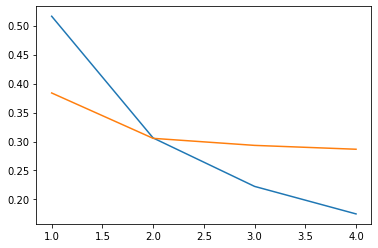

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)

plt.show()

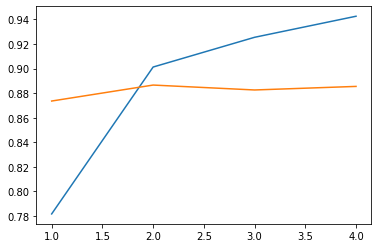

In [9]:
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.show()

In [0]:
y_pred = model.predict(x_test)

In [11]:
y_pred

array([[0.29831126],
       [0.99962044],
       [0.988411  ],
       ...,
       [0.17300293],
       [0.19747442],
       [0.58639425]], dtype=float32)

In [12]:
print(model.evaluate(x_test,y_test))

25000/25000 [==============================] - 2s 87us/step
[0.3031497582626343, 0.87664]
